<a href="https://colab.research.google.com/github/AtshayaSrinivasan47/generative-ai-for-beginners/blob/main/DataMining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1 [0.0]
2 [0.0, 0.04690363172600355]
3 [0.0, 0.04690363172600355, 0.0400849875519463]
4 [0.0, 0.04690363172600355, 0.0400849875519463, 0.03160033404868844]
5 [0.0, 0.04690363172600355, 0.0400849875519463, 0.03160033404868844, -0.002040097380179964]
6 [0.0, 0.04690363172600355, 0.0400849875519463, 0.03160033404868844, -0.002040097380179964, 0.004623445192032913]
7 [0.0, 0.04690363172600355, 0.0400849875519463, 0.03160033404868844, -0.002040097380179964, 0.004623445192032913, -0.0027563535009527415]
8 [0.0, 0.04690363172600355, 0.0400849875519463, 0.03160033404868844, -0.002040097380179964, 0.004623445192032913, -0.0027563535009527415, -0.0003052816910310845]
9 [0.0, 0.04690363172600355, 0.0400849875519463, 0.03160033404868844, -0.002040097380179964, 0.004623445192032913, -0.0027563535009527415, -0.0003052816910310845, 0.013578961054627364]


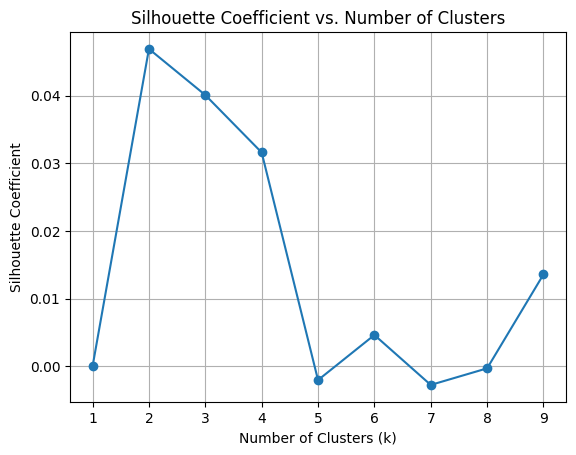

In [4]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Function to load dataset
def dataset_load(filename):
    try:
        # Loading dataset
        with open(filename,"r") as file:
            lines=file.readlines()
            dataset=[]
            for line in lines:
                # Splitting each line by space
                values=line.strip().split()
                # converting first column to categorical data and the rest to float
                row=[values[0]]+[float(val) for val in values[1:]]
                dataset.append(row)
            return np.array(dataset)
    except Exception as e:
        print("Error loading dataset", e)
        return None

# computing the distance between two points
def distance_Computation(point1, point2):
    # Skip the first column (categorical values)
    point1_numeric = point1[1:].astype(float)
    point2_numeric = point2[1:].astype(float)
    return np.linalg.norm(point1_numeric - point2_numeric)

# Below are the function to choose a random initial cluster representative(centroids)
def initial_centroid_selection(data,k):
    index=np.random.choice(len(data),k, replace=False)
    return data[index]

# Assigning clusterId to each data point
def assign_Cluster_Ids(data,centroids):
    cluster_Id=[]
    for point in data:
        distances=[distance_Computation(point,centroid) for centroid in centroids]
        cluster_Id.append(np.argmin(distances))
    return np.array(cluster_Id)

# Function to calculating cluster representatives based on clusterId defined
def cluster_Representative(data, clusterId,k):
    centroids=[]
    for i in range(k):
        cluster_data_points=data[clusterId==i]
        centroids.append(np.mean(cluster_data_points, axis=0))
        plt.plot(data, np.array(centroids))
    return np.array(centroids)

# function to calculate K means clustering algorithm(unsupervised)
def kMeans_Cluster_Algorithm(data, k, max_Iter=5):
    # splitting data based on categorical and numerical data
    categorical_data=data[:,0].reshape(-1,1)
    numerical_data=data[:,1].astype(float)

    # one hot encode categorical data
    unique_categories=np.unique(categorical_data)
    encode_categorical_data=np.zeros((len(categorical_data),len(unique_categories)))
    for i, category in enumerate(unique_categories):
        encode_categorical_data[:,i]=(categorical_data==category).flatten()

    # combine encoded categorical data with numerical data
    combined_data=np.hstack((encode_categorical_data, numerical_data.reshape(-1, 1)))

    # Initialise centroids
    centroids=initial_centroid_selection(combined_data,k)

    # K means clustering
    for _ in range(max_Iter):
        previous_centroid=centroids
        cluster_Ids=assign_Cluster_Ids(combined_data,centroids)
        if np.array_equal(previous_centroid, centroids):
            break
    return cluster_Ids, centroids

def silhouette_score(data, clusterIds):
    silhouette_scores = []
    for i in range(len(data)):
        # Compute average distance to other points in the same cluster
        clusterId = clusterIds[i]
        points_in_same_cluster = data[clusterIds == clusterId]
        intra_cluster_distance = np.mean([distance_Computation(data[i], point) for point in points_in_same_cluster])

        # Compute average distance to points in other clusters
        inter_cluster_distances = []
        for j in range(len(data)):
            if clusterIds[j] != clusterId:
                points_in_other_cluster = data[clusterIds == clusterIds[j]]
                inter_cluster_distances.append(np.mean([distance_Computation(data[i], point) for point in points_in_other_cluster]))

        # Compute silhouette score for the point
        if len(inter_cluster_distances) > 0:
            min_inter_cluster_distance = min(inter_cluster_distances)
            silhouette_score = (min_inter_cluster_distance - intra_cluster_distance) / max(intra_cluster_distance, min_inter_cluster_distance)
            silhouette_scores.append(silhouette_score)

    # Return average silhouette score
    return np.mean(silhouette_scores) if silhouette_scores else 0.0

def main():
    #calling load dataset function
    filename='dataset.txt'
    dataset=dataset_load(filename)
    if dataset is None:
        return

    # implementing k means clustering algorithm
    k_values=range(1,10)
    silhouette_scores=[]
    for k in k_values:
        clusterIds,_=kMeans_Cluster_Algorithm(dataset,k)
        silhouette_scores.append(silhouette_score(dataset, clusterIds))
        print(k,silhouette_scores)

    # Plot silhouette coefficient vs. number of clusters for k-means
    plt.plot(k_values, silhouette_scores, marker='o')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Silhouette Coefficient')
    plt.title('Silhouette Coefficient vs. Number of Clusters')
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    main()
